<a href="https://colab.research.google.com/github/ihyaulumuddin044/Pengantar_ML/blob/main/modules/logistic_regression/logistic_regression_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [86]:
df = pd.DataFrame({"Jam_Belajar":[0.5,1.0, 1.5, 2.0, 2.5, 3.0],
                   "Hasil":['gagal(0)', 'gagal(0)', 'gagal(0)', 'lulus(1)', 'lulus(1)', 'lulus(1)']})
print(df)

   Jam_Belajar     Hasil
0          0.5  gagal(0)
1          1.0  gagal(0)
2          1.5  gagal(0)
3          2.0  lulus(1)
4          2.5  lulus(1)
5          3.0  lulus(1)


In [87]:
#  ubah data kategorikal menjadi number
import sklearn.preprocessing as preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Hasil']= label_encoder.fit_transform(df['Hasil'])
print(f'data setelah di encode: \n{df}')

data setelah di encode: 
   Jam_Belajar  Hasil
0          0.5      0
1          1.0      0
2          1.5      0
3          2.0      1
4          2.5      1
5          3.0      1


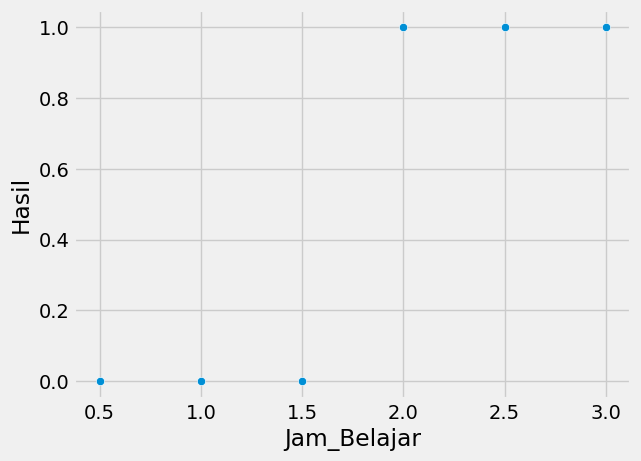

In [88]:
# visulisasi data
sns.scatterplot(x='Jam_Belajar', y='Hasil', data=df)
plt.show()

In [89]:
# --- 1. Persiapan Data ---
# Variabel independen (Jam Belajar)
# Kita tambahkan kolom '1' di awal untuk intercept (beta_0)
# Ini adalah trik umum untuk memasukkan beta_0 ke dalam perhitungan matriks
# X = np.array('Jam_Belajar') # Salah: X seharusnya adalah kolom data

# Tetapkan kolom 'Jam_Belajar' dengan benar dan tambahkan suku intercept
X = df['Jam_Belajar'].values.reshape(-1, 1) # Ambil nilai dan ubah bentuk menjadi array 2D
X = np.hstack([np.ones((X.shape[0], 1)), X]) # Tambahkan kolom berisi angka satu untuk intercept

# Variabel dependen (Lulus/Gagal)
# y = np.array('Hasil') # Salah: y seharusnya adalah kolom data

# Tetapkan kolom 'Hasil' dengan benar
y = df['Hasil'].values

# --- 2. Fungsi Sigmoid ---
# Fungsi ini mengubah nilai Z (logit) menjadi probabilitas antara 0 dan 1
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# --- 3. Fungsi Log-Likelihood (Opsional, untuk monitoring) ---
# Fungsi ini menghitung seberapa "baik" model kita saat ini
def compute_log_likelihood(X, y, beta):
    # Hitung probabilitas yang diprediksi
    predictions = sigmoid(X @ beta) # X @ beta adalah dot product (mirip dengan beta_0 + beta_1*X1)

    # Menghindari log(0) yang akan menghasilkan -inf
    # Kita batasi probabilitas agar tidak persis 0 atau 1
    predictions = np.clip(predictions, 1e-10, 1 - 1e-10)

    # Hitung log-likelihood
    # Periksa apakah y sudah berupa array numpy, jika belum ubah
    if not isinstance(y, np.ndarray):
      y = np.array(y)
    log_likelihood = np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return log_likelihood

# --- 4. Implementasi Gradient Descent ---
# Algoritma ini akan mencari koefisien beta yang optimal
def train_logistic_regression(X, y, learning_rate, n_iterations):
    # Inisialisasi koefisien beta (intercept dan koefisien X1)
    # Kita mulai dengan nilai acak kecil atau nol
    beta = np.zeros(X.shape[1]) # [0, 0] untuk beta_0 dan beta_1

    # Loop iterasi untuk optimasi
    for i in range(n_iterations):
        # a. Hitung prediksi probabilitas (h)
        # Z = X @ beta
        z = X @ beta
        h = sigmoid(z) # Ini adalah P(Y=1|X)

        # b. Hitung error (perbedaan antara y aktual dan h)
        error = h - y

        # c. Hitung gradien (seberapa banyak kita perlu menyesuaikan beta)
        # Gradien adalah turunan dari fungsi log-likelihood
        # Formula gradien untuk regresi logistik: X.T @ error
        gradient = X.T @ error / len(y) # Dibagi dengan jumlah titik data (gradien rata-rata)

        # d. Perbarui koefisien beta
        beta -= learning_rate * gradient

        # (Opsional) Cetak log-likelihood setiap beberapa iterasi untuk memantau kemajuan
        if i % 1000 == 0: # Cetak setiap 1000 iterasi
            ll = compute_log_likelihood(X, y, beta)
            # print(f"Iterasi {i}, Log-Likelihood: {ll:.4f}, Beta: {beta}")

    return beta

# --- 5. Jalankan Pelatihan ---
learning_rate = 0.1 # Seberapa besar langkah penyesuaian untuk beta di setiap iterasi
n_iterations = 100000 # Berapa kali kita akan mengulangi penyesuaian

print("Memulai pelatihan model Regresi Logistik...")
optimal_beta = train_logistic_regression(X, y, learning_rate, n_iterations)
print("\nPelatihan selesai.")
print(f"Koefisien optimal (beta_0, beta_1): {optimal_beta}")

# --- 6. Fungsi Prediksi ---
# Setelah model dilatih, kita bisa menggunakannya untuk prediksi
def predict_proba(X_new, beta):
    # Pastikan X_new memiliki suku intercept jika belum disertakan
    if X_new.ndim == 1 and len(X_new) == 1: # Satu titik data tanpa intercept
        X_new = np.array([1, X_new[0]])
    elif X_new.ndim > 1 and X_new.shape[1] == 1: # Beberapa titik data tanpa intercept
         X_new = np.hstack([np.ones((X_new.shape[0], 1)), X_new])

    z = X_new @ beta
    return sigmoid(z)

def predict_class(X_new, beta, threshold=0.5):
    probabilities = predict_proba(X_new, beta)
    return (probabilities >= threshold).astype(int) # Ubah probabilitas menjadi 0 atau 1

# --- 7. Uji Model ---
print("\n--- Menguji Model ---")

# Prediksi untuk data yang sudah ada
print("\nPrediksi untuk data pelatihan:")
# Perlu mengulang data asli dengan intercept untuk pengujian prediksi
for i in range(X.shape[0]):
    jam_belajar = X[i, 1] # Ambil nilai jam_belajar yang sebenarnya
    predicted_prob = predict_proba(X[i], optimal_beta) # Prediksi menggunakan titik data dengan intercept
    predicted_class = predict_class(X[i], optimal_beta)
    actual_class = y[i]
    print(f"Jam: {jam_belajar:.1f} | Probabilitas Lulus: {predicted_prob:.4f} | Prediksi: {predicted_class} | Aktual: {actual_class}")


# Prediksi untuk siswa baru
print("\nPrediksi untuk siswa baru:")
siswa_baru_jam = 1.8
# Jangan lupa tambahkan '1' di depan untuk intercept
X_siswa_baru = np.array([1, siswa_baru_jam])
prob_siswa_baru = predict_proba(X_siswa_baru, optimal_beta)
class_siswa_baru = predict_class(X_siswa_baru, optimal_beta)
print(f"Siswa belajar {siswa_baru_jam:.1f} jam: Probabilitas Lulus: {prob_siswa_baru:.2f} | Prediksi: {class_siswa_baru}")

siswa_baru_jam_2 = 1.7
X_siswa_baru_2 = np.array([1, siswa_baru_jam_2])
prob_siswa_baru_2 = predict_proba(X_siswa_baru_2, optimal_beta)
class_siswa_baru_2 = predict_class(X_siswa_baru_2, optimal_beta)
print(f"Siswa belajar {siswa_baru_jam_2:.1f} jam: Probabilitas Lulus: {prob_siswa_baru_2:.2f} | Prediksi: {class_siswa_baru_2}")

Memulai pelatihan model Regresi Logistik...

Pelatihan selesai.
Koefisien optimal (beta_0, beta_1): [-27.50642542  15.78098601]

--- Menguji Model ---

Prediksi untuk data pelatihan:
Jam: 0.5 | Probabilitas Lulus: 0.0000 | Prediksi: 0 | Aktual: 0
Jam: 1.0 | Probabilitas Lulus: 0.0000 | Prediksi: 0 | Aktual: 0
Jam: 1.5 | Probabilitas Lulus: 0.0211 | Prediksi: 0 | Aktual: 0
Jam: 2.0 | Probabilitas Lulus: 0.9830 | Prediksi: 1 | Aktual: 1
Jam: 2.5 | Probabilitas Lulus: 1.0000 | Prediksi: 1 | Aktual: 1
Jam: 3.0 | Probabilitas Lulus: 1.0000 | Prediksi: 1 | Aktual: 1

Prediksi untuk siswa baru:
Siswa belajar 1.8 jam: Probabilitas Lulus: 0.71 | Prediksi: 1
Siswa belajar 1.7 jam: Probabilitas Lulus: 0.34 | Prediksi: 0


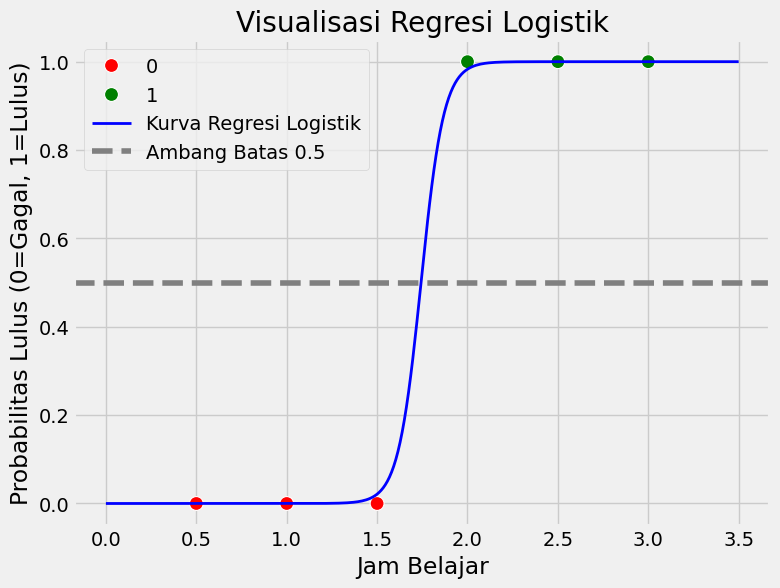

In [90]:
# --- Visualisasi Kurva Regresi Logistik ---

# Buat rentang nilai Jam_Belajar untuk plotting kurva
# Kita perlu nilai yang lebih halus daripada data aslinya
jam_range = np.linspace(df['Jam_Belajar'].min() - 0.5, df['Jam_Belajar'].max() + 0.5, 300)

# Untuk setiap nilai Jam_Belajar dalam rentang, hitung probabilitas lulus
# Kita perlu menambahkan kolom '1' di depan untuk intercept, seperti saat pelatihan
X_plot = np.vstack([np.ones(len(jam_range)), jam_range]).T

# Hitung probabilitas lulus menggunakan model yang sudah dilatih
prob_lulus_plot = predict_proba(X_plot, optimal_beta)

# Buat plot
plt.figure(figsize=(8, 6))

# Scatter plot data asli
# Palet diperbarui untuk menggunakan kunci numerik 0 dan 1
sns.scatterplot(x='Jam_Belajar', y='Hasil', data=df, s=100, hue='Hasil', palette={0:'red', 1:'green'})

# Plot kurva regresi logistik (probabilitas lulus)
plt.plot(jam_range, prob_lulus_plot, color='blue', linewidth=2, label='Kurva Regresi Logistik')

# Tambahkan garis ambang batas (misalnya, 0.5)
plt.axhline(0.5, color='grey', linestyle='--', label='Ambang Batas 0.5')

# Tambahkan label dan judul
plt.xlabel('Jam Belajar')
plt.ylabel('Probabilitas Lulus (0=Gagal, 1=Lulus)')
plt.title('Visualisasi Regresi Logistik')
plt.legend()
plt.grid(True)
plt.show()

# implementasi dengan scikit learn

In [91]:
data = pd.read_csv('Logistic_Regression.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [92]:
data.shape

(768, 9)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [94]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

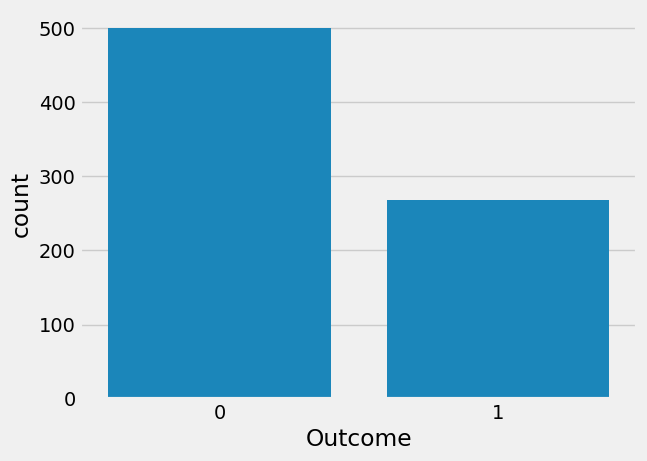

In [95]:
sns.countplot(x='Outcome',data=data)

<ipython-input-96-e17bd2faf085>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'].dropna(),kde=True)


<Axes: xlabel='Age', ylabel='Density'>

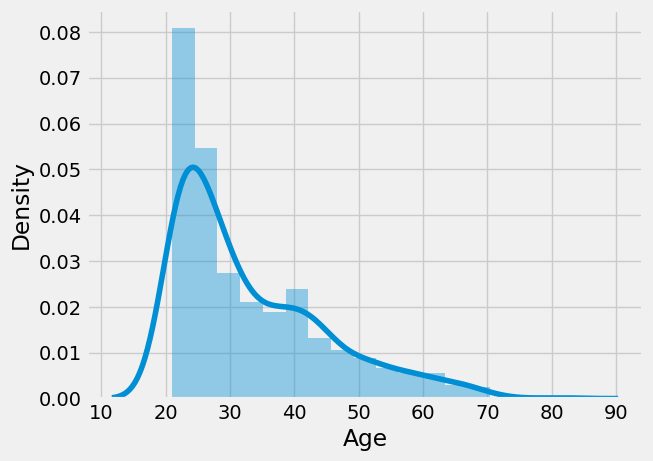

In [96]:
sns.distplot(data['Age'].dropna(),kde=True)

<Axes: >

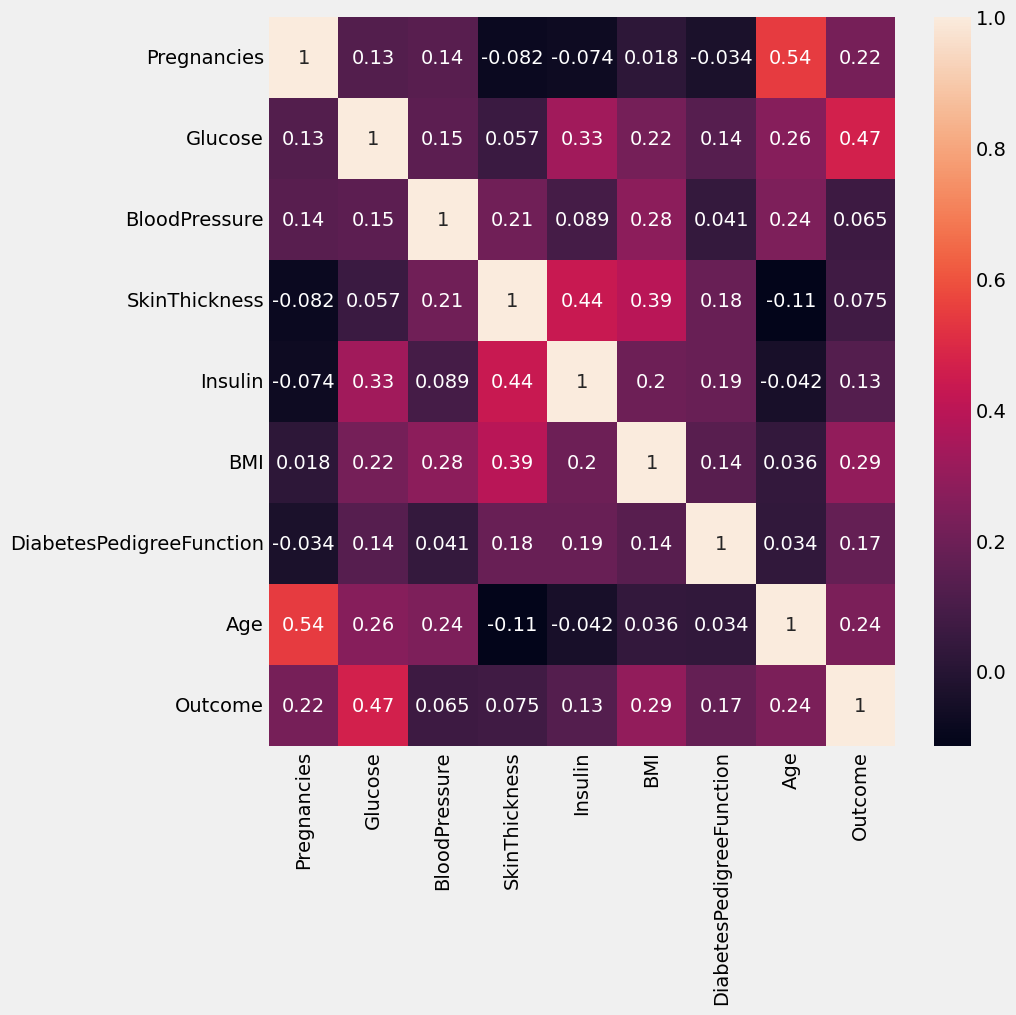

In [97]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(), annot=True)

In [98]:
# membuat target dan fitur
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [99]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = scalar.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [101]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

[[121  30]
 [ 30  50]]
